<a href="https://colab.research.google.com/github/hsleonis/Switcheroo/blob/master/cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Cancer Analysis

In [1]:
### Some imports
import numpy as np               # efficient matrix-vector operations
import numpy.linalg as la        # linear algebra (solvers etc.)
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            # data visualization
import matplotlib.pyplot as plt  # basic plotting

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# import dataset
df = pd.read_csv('https://drive.google.com/uc?id=1-ZeH2bMqmqRBo3t9wAuT4JixE9qOKZaa')

# set target labels
labels = df['diagnosis']

# drop first unnamed column
df.drop(df.columns[0], axis=1, inplace=True)

# drop labels
df.drop(['diagnosis'], axis=1, inplace=True)

# check dataset
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition
0,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,lung
1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900,heart
2,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.1240,0.17950,0.1377,0.09532,0.3455,0.06896,lung
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.010,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783,heart
4,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.363,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,heart


In [40]:
# check data for cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [39]:
# check distribution of diagnosis
labels.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
# one hot encoding of precondition
new_df = pd.get_dummies(df)
new_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition_heart,precondition_lung,precondition_other
0,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,0,1,0
1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900,1,0,0
2,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.1240,0.17950,0.1377,0.09532,0.3455,0.06896,0,1,0
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.010,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783,1,0,0
4,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.363,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,1,0,0


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, labels, test_size=.33, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Accuracy Scores
print("Train accuracy: ", round(clf.score(X_train, y_train), 4))
print("Test accuracy: ", round(clf.score(X_test, y_test), 4))

Train accuracy:  1.0
Test accuracy:  0.9628


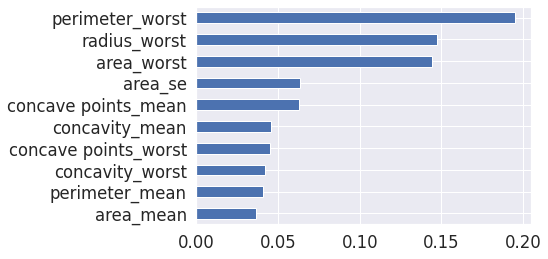

In [35]:
# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=new_df.columns).sort_values()
feature_importance[-10:].plot(kind='barh')

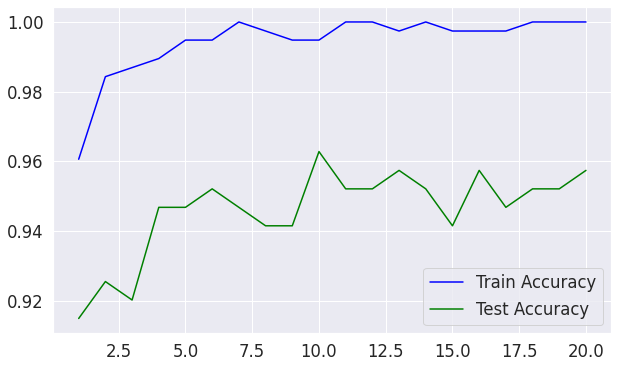

In [41]:
# training and testing accuracy depending on the number of trees
train_acc, test_acc = [], []

for i in range(1, 21):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  
  train_acc.append(round(clf.score(X_train, y_train), 4))
  test_acc.append(round(clf.score(X_test, y_test), 4))

x_ax = [i for i in range(1, 21)]
plt.figure(figsize=(10, 6))
plt.plot(x_ax, train_acc, label="Train Accuracy", color='blue')
plt.plot(x_ax, test_acc, label="Test Accuracy", color='green')
plt.legend(loc='lower right')
plt.show()